In [1]:
#Họ và tên: TRAN VIET TRUONG
#MSV: 2021600591
#Kiem tra tx2

Sử dụng công cụ Python và thực hiện các yêu cầu sau:

a. Đọc dữ liệu từ tệp cho trước và thực hiện phép chuẩn hóa theo phương pháp min-max

b. Chuẩn bị dữ liệu cho quá trình thực hiện sử dụng phương pháp K-Fold với k = 3,

c. dựa trên dữ liệu đã sử lý ở câu 1, sử dụng Bayes và thực hiện huấn luyện phương pháp kiểm định chéo qua 4 chỉ số và thời gian, biểu đồ, hiển thị trung bình

d.  dựa trên dữ liệu đã sử lý ở câu 1, sử dụng SVM mô hình phi tuyến tính và thực hiện huấn luyện phương pháp kiểm định chéo qua 4 chỉ số và thời gian, biểu đồ, hiển thị trung bình


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer
warnings.filterwarnings('ignore')

Câu a

In [9]:
# Khai báo các giá trị tham số
FILE_PATH = 'data_tx2.csv'
KFOLD = 3

In [4]:
try:
    df = pd.read_csv(FILE_PATH)
    print(df.head())
except FileNotFoundError:
    print('File not found')

     A     B    C    D    E     F    G CLASS
0  9.0  15.0  3.7  2.9  1.2   5.9  4.0     P
1  3.5   4.5  3.1  2.5  2.8  10.0  6.7     N
2  4.1   4.9  2.1  3.7  2.5  10.0  3.3     P
3  4.6   3.5  2.5  2.2  2.7  11.0  7.2     P
4  5.6   1.6  4.1  3.9  4.7   5.6  2.9     N


In [10]:
# Tiền xử lý dữ liệu
df['CLASS'] = LabelEncoder().fit_transform(df['CLASS'])

# Chuẩn bị dữ liệu
df_X = df.iloc[:, :-1]
df_y = df.iloc[:, -1]

# Chuẩn hóa Min-Max
df_X = MinMaxScaler().fit_transform(df_X)
print("Dữ liệu sau khi chuẩn hóa \n",df_X)

Dữ liệu sau khi chuẩn hóa 
 [[1.         1.         0.8        0.0625     0.         0.37209302
  0.30434783]
 [0.19117647 0.21641791 0.5        0.02678571 0.4        0.84883721
  0.89130435]
 [0.27941176 0.24626866 0.         0.13392857 0.325      0.84883721
  0.15217391]
 [0.35294118 0.14179104 0.2        0.         0.375      0.96511628
  1.        ]
 [0.5        0.         1.         0.15178571 0.875      0.3372093
  0.06521739]
 [0.51470588 0.17164179 0.25       0.32142857 0.275      0.22093023
  0.2173913 ]
 [0.98529412 0.06716418 0.15       0.11607143 0.1        0.79069767
  0.04347826]
 [0.10294118 0.11940299 0.4        0.13392857 0.675      0.91860465
  0.30434783]
 [0.         0.04477612 0.9        1.         0.25       1.
  0.06521739]
 [0.60294118 0.18656716 0.15       0.88392857 0.15       0.
  0.30434783]
 [0.01470588 0.1119403  0.7        0.         1.         0.36046512
  0.08695652]
 [0.82352941 0.08208955 0.65       0.04464286 0.975      0.08139535
  0.        ]]


Câu b

In [11]:
# Khởi tạo KFold với 3 folds
kf = KFold(n_splits= KFOLD, shuffle=False)

#Chia du lieu dua tren KFold
X_train_list = []  # Initialize as lists
X_test_list = []
y_train_list = []
y_test_list = []

for train_index, test_index in kf.split(df_X):
    X_train, X_val = df_X[train_index], df_X[test_index]
    y_train, y_val = df_y[train_index], df_y[test_index]

    X_train_list.append(X_train)
    X_test_list.append(X_val)
    y_train_list.append(y_train)
    y_test_list.append(y_val)

# Convert lists to NumPy arrays
X_train = np.concatenate(X_train_list)
X_test = np.concatenate(X_test_list)
y_train = np.concatenate(y_train_list)
y_test = np.concatenate(y_test_list)


Câu c

In [12]:
# Đánh giá mô hình theo phương pháp kiểm định chéo so sánh NB
time_nb = []
acc_nb = []
prec_nb = []
rec_nb = []
f1_nb = []

for i in range(KFOLD):
    # Khởi tạo mô hình NB
    model_nb = GaussianNB()
     # Huấn luyện mô hình NB
    start_nb = time.time()
    model_nb.fit(X_train[i], y_train[i])
    end_nb = time.time() - start_nb
    # Dự đoán mô hình nb
    yk_pred_nb = model_nb.predict(X_test[i])
    # Đưa ra độ chính xác mô hình SVM
    accuracy_nb = accuracy_score(y_test[i], yk_pred_nb)
    precision_nb = precision_score(y_test[i], yk_pred_nb)
    recall_nb = recall_score(y_test[i], yk_pred_nb)
    f1score_nb = f1_score(y_test[i], yk_pred_nb)


    # Append vào các độ đo SVM mảng
    time_nb.append(end_nb)
    acc_nb.append(accuracy_nb)
    prec_nb.append(precision_nb)
    rec_nb.append(recall_nb)
    f1_nb.append(f1score_nb)
time_nb = np.array(time_nb)
acc_nb = np.array(acc_nb)
prec_nb = np.array(prec_nb)
rec_nb = np.array(rec_nb)
f1_nb = np.array(f1_nb)
print("Average Time:", time_nb.mean())
print("Average Accuracy:", acc_nb.mean())
print("Average Precision:", prec_nb.mean())
print("Average Recall:", rec_nb.mean())
print("Average F1-score:", f1_nb.mean())
# Create a figure and axes
fig, ax = plt.subplots()

# Create the bar plot with four different colors
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Time']
values = [acc_nb.mean(), prec_nb.mean(), rec_nb.mean(), f1_nb.mean(), time_nb.mean()]
colors = ['pink', 'blue', 'green', 'orange', 'purple']  # Define four colors
ax.bar(metrics, values, color=colors)  # Set colors for the bars

# Set the title and labels
ax.set_title('Naive Bayes Performance Metrics')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')

# Display the plot
plt.show()


ValueError: y should be a 1d array, got an array of shape () instead.

Câu d

Average Time (SVM): 0.0017138322194417317
Average Accuracy (SVM): 0.9166666666666666
Average Precision (SVM): 0.8888888888888888
Average Recall (SVM): 1.0
Average F1-score (SVM): 0.9411764705882352


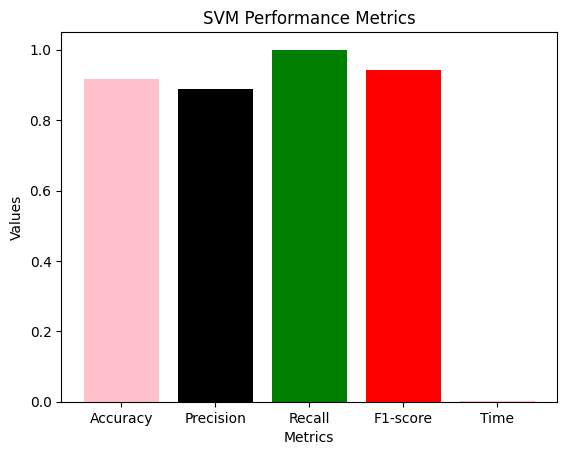

In [ ]:
# Đánh giá mô hình theo phương pháp kiểm định chéo so sánh SVM
time_svm = []
acc_svm = []
prec_svm = []
rec_svm= []
f1_svm = []


for i in range(KFOLD):
    # Khởi tạo mô hình SVM
    model_svm = SVC()

    # Huấn luyện mô hình SVM
    start_svm = time.time()
    model_svm.fit(X_train[i], y_train[i])
    end_svm = time.time() - start_svm

    # Dự đoán mô hình SVM
    yk_pred_svm = model_svm.predict(X_test[i])

    # Đưa ra độ chính xác mô hình SVM
    accuracy_svm = accuracy_score(y_test[i], yk_pred_svm)
    precision_svm = precision_score(y_test[i], yk_pred_svm)
    recall_svm = recall_score(y_test[i], yk_pred_svm)
    f1score_svm = f1_score(y_test[i], yk_pred_svm)

    # Append vào các độ đo SVM mảng
    time_svm.append(end_svm)
    acc_svm.append(accuracy_svm)
    prec_svm.append(precision_svm)
    rec_svm.append(recall_svm)
    f1_svm.append(f1score_svm)

acc_svm = np.array(acc_svm)
prec_svm = np.array(prec_svm)
rec_svm = np.array(rec_svm)
f1_svm = np.array(f1_svm)
time_svm = np.array(time_svm)
print("Average Time (SVM):", time_svm.mean())
print("Average Accuracy (SVM):", acc_svm.mean())
print("Average Precision (SVM):", prec_svm.mean())
print("Average Recall (SVM):", rec_svm.mean())
print("Average F1-score (SVM):", f1_svm.mean())
# Create a figure and axes
fig, ax = plt.subplots()

# Create the bar plot with four different colors
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Time']
values = [acc_svm.mean(), prec_svm.mean(), rec_svm.mean(), f1_svm.mean(), time_svm.mean()]
colors = ['pink', 'black', 'green', 'red']  # Define four colors: red, blue, green, yellow
ax.bar(metrics, values, color=colors)  # Set colors for the bars

# Set the title and labels
ax.set_title('SVM Performance Metrics')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')

# Display the plot
plt.show()